<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исключение-редких-и-выбивающихся-значений" data-toc-modified-id="Исключение-редких-и-выбивающихся-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исключение редких и выбивающихся значений</a></span></li><li><span><a href="#Анализ-факторов,-влияющих-на-стоимость-квартиры" data-toc-modified-id="Анализ-факторов,-влияющих-на-стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ факторов, влияющих на стоимость квартиры</a></span></li><li><span><a href="#Анализ-десяти-населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населенных-пунктов-с-наибольшим-числом-объявлений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ десяти населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ изменения цены по степени удалённости от центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Исследовательский анализ данных включает в себя:
- предобработку данных
- доподлненительные расчеты
- исключение редких и выбивающихся значений
- анализ факторов, вляющих на стоимость квартир
- анализ 10 населенных пунктов с наибольшим числом объявлений
- анализ изменения цены по степени удаленности от центра

Рабочие гипотезы:
- квартиры в центре города в среднем имеют цену выше за квадратный метр 
- количество комнат в квартире влияет на стоимость квадратного метра
- этаж квартиры влияет на стоимость квадратного метра 
- дата размещения объявления вдлияет на стоимость квадратного метра 

## Изучение данных из файла

Загрузка необходимых библиотек:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Загрузка данных:

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

Изучение общей информации о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Таблица содержит 23699 строк и 22 столбца. Данные в таблице имеют типы bool, object и int64, float64. Имеются пропущенные значения более чем в половине столбцов. 

Так как столбцов 22, выведем для обзора данных случайные 5 строк таблицы в транспонированном виде:

In [5]:
data.sample(5).T

,1499,16129,21034,5337,135
total_images,20,13,13,6,7
last_price,6.2e+06,7.265e+06,3.8e+06,3.6e+06,3.99e+06
total_area,65,69.2,46.39,35.29,48
first_day_exposition,2019-04-08T00:00:00,2017-05-22T00:00:00,2017-06-20T00:00:00,2017-12-13T00:00:00,2018-09-28T00:00:00
rooms,2,2,2,1,1
ceiling_height,2.8,3,NaN,NaN,3.25
floors_total,9,15,5,20,5
living_area,NaN,36.7,29.83,15.8,20.5
floor,6,7,4,9,1
is_apartment,False,False,NaN,NaN,False


Таблица разбита на следующие столбцы:

- total_images — число фотографий квартиры в объявлении  
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Изучим данные с помощью метода describe (в транспорированном виде):

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В данных, предоставленных сервисом Яндекс.Недвижимость, представлены объявления о продаже квартир, чьи характеристики могут очень сильно различаться:
- диапазон цен от 12190 до 763000000, в среднем 6541549, а медианное значение - 6800000
- площадь от 12 до 900, в среднем 35,6, медианное значение - 52
- количество комнат от 1 до 19, а так же присутствуют типы жилья "студия", "со свободной планировкой" и "апартаменты"
- высота потолков от 1 до 100 м, медианное значение - 2.65 м
- с балконами и без
- этажность квртир от 1 до 33 этажа, а этажность домов до 60 этажа
- в среднем кухни имеют площадь 10 квадратных метра (медиана - 9), а жилая площадь - 34 квадратных метра (медиана - 30)
- с среднем до 3000 м от квартиры есть водоём, а парк отсутствует
- среднее расстояние от центра города 18180 м, но разброс данных от 181 м до 65968 м (медиана - 13098)

Эти наблюдения носят предварительный характер, так как необходимо проанализировать пропуски и по возможности их заполнить, а так же исключить аномальные значения(выбросы)

**Вывод**

Каждая строка содержит данные о квартире на продажу. Для дальнейшего исследовательского анализа необходимовыяснить причину пропущенных значений, заполнить их там, где это уместнои необходимо, избавиться от аномальных значений и оптимизировать типы данных.

## Предобработка данных

### Обработка пропусков

Первый столбец, в котором встречаются пропущенные значения - `ceiling_height`(высота потолков). В этом же столбце была выделена аномалия в виде максимального значения 100 м. Эти данные относятся к категории, которую заполняет пользователь, поэтому тут возможны и пропуски и ошибки. Рассмотрим, как распределена высота потолков в полученных данных и чему равно медианное значение:

In [7]:
print(data['ceiling_height'].describe())
print('median', data['ceiling_height'].median())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
median 2.65


Получены среднее(2.77 м) и медианное(2.65 м) значения. Заменим пропущенные значения медианным:

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Следующий столбец с пропусками - `floors_total`(количество этажей в доме), при этом пропущенных значений в столбце floor нет. Выведем эти два столбца, для строк с пропусками:

In [9]:
data.loc[data['floors_total'].isna()][['floor', 'floors_total']]

,floor,floors_total
186,4,NaN
237,1,NaN
457,12,NaN
671,8,NaN
1757,9,NaN
...,...,...
22542,3,NaN
22656,20,NaN
22808,6,NaN
23590,18,NaN


Всего 86 строк с пропущенной этажностью дома, при этом квартиры находятся на разных этажах. Будем считать, что эти квартиры находятся на последних этажах и присвоим пропущенным значениям этаж квартиры:

In [10]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Рассмотрим, как пропуски в столбце `living_area` распределены по числу комнат в квартире:

In [11]:
data.loc[data['living_area'].isna()]['rooms'].value_counts()

1    659
2    644
3    448
4     91
5     34
0     14
7      6
6      6
9      1
Name: rooms, dtype: int64

Пропуски в столбце `living_area` заменим медианным значением отношения жилой площади к полной, характерным для квартир с таким-же количеством комнат. Добавим в таблицу столбец с отношением жилой площади к полной:

In [12]:
data['living_area_ratio'] = data['living_area'] / data['total_area']

Сгруппируем данные по числу комнат, вычислим медианное значение отношения жилой площади к полной:

In [13]:
living_area_ratio_median = data.groupby(by='rooms')['living_area_ratio'].median()
living_area_ratio_median

rooms
0     0.689655
1     0.482488
2     0.585009
3     0.631667
4     0.659740
5     0.651842
6     0.679412
7     0.681670
8     0.688475
9     0.628251
10    0.653103
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
Name: living_area_ratio, dtype: float64

Для заполнения пустых значений напишем функцию, которая присваивает столбцу `living_area` медианное значение в зависимости от числа комнат в квартире:

In [14]:
def living_area_to_median(row):
    """Присваивает значение living_area в зависимости от количества комнат."""
    room = row['rooms']
    row['living_area'] = living_area_ratio_median.loc[room] * row['total_area']
    return row
     
data.loc[data['living_area'].isna()] = data.apply(living_area_to_median, axis=1)

Так как мы создали столбец `living_area_ratio` до заполнения пропусков в столбце `living_area`, в нём есть пропущенные значения. Заполним их:

In [15]:
data.loc[data['living_area_ratio'].isna(), ('living_area_ratio')] = data['living_area'] / data['total_area']

В столбце `is_apartment` пропуски могут возникать вследствии того, что пользователь не стал заполнять это поле. Апартаменты достаточно редкий вид жилья, поэтому пропущенным значениям присвоим **False**:

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Посчитаем пропуски в столбце `kitchen_area`:

In [17]:
data['kitchen_area'].isna().sum()

2278

Пропуски в столбце `kitchen_area` могут возникнуть вследствии того, что квартира является студией или иметь свободную планировку:

In [18]:
data.loc[
    (data['kitchen_area'].isnull()) & 
    ((data['studio'] | (data['rooms'] == 0) | (data['open_plan'])))]['studio'].count()

216

Мы нашли объяснение для 216 строк, но остаётся ещё более 2000, для которых установить причину сложнее: пользователь мог случайно пропустить это поле, намеренно скрыть, не знать точные параметры своей кухни, или просто ленился заполнить. 

In [19]:
data.loc[data['rooms'] == 0,('kitchen_area')] = 0

In [20]:
data.loc[data['kitchen_area'].isnull()]['rooms'].value_counts()

1    834
2    654
3    434
4     99
5     41
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

Заполним пропуски в этом столбце по аналоги с `living_area` - создадим столбец с отношением площади кухни к полной площади, сгруппируем данные по числу комнат и найдем медианное отношение площадей:

In [21]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
kitchen_area_ratio_median = data.groupby(by='rooms')['kitchen_area_ratio'].median()
kitchen_area_ratio_median

rooms
0     0.000000
1     0.247839
2     0.161075
3     0.128571
4     0.112245
5     0.105386
6     0.099502
7     0.083717
8     0.109170
9     0.049620
10    0.091624
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
Name: kitchen_area_ratio, dtype: float64

In [22]:
def kitchen_area_to_median(row):
    """Присваивает значение kitchen_area в зависимости от количества комнат."""
    room = row['rooms']
    row['kitchen_area'] = kitchen_area_ratio_median.loc[room] * row['total_area']
    return row
     
data.loc[data['kitchen_area'].isna()] = data.apply(kitchen_area_to_median, axis=1)

Так как мы создали столбец `kitchen_area_ratio` до заполнения пропусков в столбце `kitchen_area`, в нём есть пропущенные значения. Заполним их:

In [23]:
data.loc[data['kitchen_area_ratio'].isna(), ('kitchen_area_ratio')] = data['kitchen_area'] / data['total_area']

Перейдём к столбцу `balcony`. Пропуски в этом столбце, вероятнее всего, возникли из-за того, что в квартире нет балконов. Присвоим пропущенным значениям 0:

In [24]:
data['balcony'] = data['balcony'].fillna(0)

 Интересен столбец `locality_name`.Посчитаем количество строк с пропущенными значениями.

In [25]:
data['locality_name'].isna().sum()

49

Стоит обратить на эту проблему внимание, так как при выборе жилья определяющим фактором является населенный пункт и он не должен иметь пустое значение. Перезапишем пустые значения как **Неизвестно**.

In [26]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

Проверим данные, которые получены автоматически. На первый взгляд схожеечисло пропусковможно выделить в столбцах `airports_nearest, parks_around3000, ponds_around3000, cityCenters_nearest`. Узнаем, сколько пропусков по этим столбцам и сколько строк содеержит пропуски во всех этих столбцах:

In [27]:
print('airports_nearest NaN', data['airports_nearest'].isna().sum())
print('parks_around3000 NaN', data['parks_around3000'].isna().sum())
print('ponds_around3000 NaN', data['ponds_around3000'].isna().sum())
print('cityCenters_nearest NaN',data['cityCenters_nearest'].isna().sum())
print('All these columns is NaN', len(data.loc[data['airports_nearest'].isna() & data['parks_around3000'].isna() & data['ponds_around3000'].isna() & data['cityCenters_nearest'].isna()]))

airports_nearest NaN 5542
parks_around3000 NaN 5518
ponds_around3000 NaN 5518
cityCenters_nearest NaN 5519
All these columns is NaN 5518


23% данных содержит пропуски по столбцам, которые заполняются на основе картографических данных. Нужно обратить на эту проблему внимание разработчиков Яндекс.Недвижимость.
Проверим, как распределены медианные значения для этих столбцов по населенным пунктам. Для этого приведем столбец `locality_name` к единому формату - название населённого пункта без указания типа. Рассмотрим список уникальных значений:

In [28]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Названия населенных пунктов написаны с заглавной буквы, а типы - прописными. Применим функцию, отбрасывающую тип населенного пункта:

In [29]:
def locality_name(location):
    """Возвращает срез строки, начиная с первого символа в верхнем регистре."""
    while location[0].upper() != location[0] or location[0] == ' ':
        location = location[1:]
    return location

data['locality_name'] = data['locality_name'].apply(locality_name)

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Сгруппируем данные по названию населенного пункта, получим медианное значение для столбцов airports_nearest, parks_around3000, ponds_around3000, cityCenters_nearest:

In [31]:
locality = data.groupby('locality_name')[['airports_nearest', 'parks_around3000', 'ponds_around3000', 'cityCenters_nearest']].median()
locality

,airports_nearest,parks_around3000,ponds_around3000,cityCenters_nearest
locality_name,,,,
Агалатово,NaN,NaN,NaN,NaN
Александровская,12896.5,0.0,1.0,27468.0
Алексеевка,NaN,NaN,NaN,NaN
Аннино,NaN,NaN,NaN,NaN
Аро,NaN,NaN,NaN,NaN
...,...,...,...,...
Юкки,NaN,NaN,NaN,NaN
Ялгино,NaN,NaN,NaN,NaN
Яльгелево,NaN,NaN,NaN,NaN


В наших данных есть населенные пункты, для которых все картографические значения пустые. Узнаем, как их много:

In [32]:
len(locality.loc[
    locality['airports_nearest'].isna() 
    & locality['parks_around3000'].isna() 
    & locality['ponds_around3000'].isna() 
    & locality['cityCenters_nearest'].isna()
].index)

278

Проблемных населенных пунктов 278 из 306. Есть ли населенные пункты, в данных которых пропуски пусть и случаются, но можно восстановить медианные значения? Проверим:

In [33]:
len(locality.loc[
    ~(locality['airports_nearest'].isna() 
    & locality['parks_around3000'].isna() 
    & locality['ponds_around3000'].isna() 
    & locality['cityCenters_nearest'].isna())
].index)

28

Всего 28 из 306. Вычислим, какой населенный пункт фигурирует в наших данных чаще остальных:

In [34]:
data['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Алексеевка             1
Котлы                  1
Пчевжа                 1
Цвылёво                1
Кивеннапа Север        1
Name: locality_name, Length: 306, dtype: int64

Заполним пропущенные значения в картографических данных характерными для Санкт-Петербурга. Узнаем значения:

In [35]:
data.query('locality_name == "Санкт-Петербург"').median()

total_images           1.000000e+01
last_price             5.500000e+06
total_area             5.500000e+01
rooms                  2.000000e+00
ceiling_height         2.650000e+00
floors_total           9.000000e+00
living_area            3.140000e+01
floor                  5.000000e+00
is_apartment           0.000000e+00
studio                 0.000000e+00
open_plan              0.000000e+00
kitchen_area           9.700000e+00
balcony                0.000000e+00
airports_nearest       2.675750e+04
cityCenters_nearest    1.224450e+04
parks_around3000       0.000000e+00
parks_nearest          4.600000e+02
ponds_around3000       1.000000e+00
ponds_nearest          5.030000e+02
days_exposition        9.500000e+01
living_area_ratio      5.727502e-01
kitchen_area_ratio     1.666667e-01
dtype: float64

In [36]:
data['airports_nearest'] = data['airports_nearest'].fillna(26757.5)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(12244.5)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Рассмотрим столбец `parks_nearest`. Вероятно, система считает расстояние до ближайшего парка в пределах 3000 м, и пустые значения могут возникать, если на расстоянии до 3000 м от квартиры парков нет. Проверим, как согласуется число пропусков в столбцах и отсутствие парков:

In [37]:
print('Число пропусков в столбце parks_nearest -',data['parks_nearest'].isna().sum())
print('Число пропусков в столбце parks_nearest при parks_around3000 = 0 -',
      len(data.loc[data['parks_nearest'].isna() & (data['parks_around3000'] == 0)].index)
)

Число пропусков в столбце parks_nearest - 15620
Число пропусков в столбце parks_nearest при parks_around3000 = 0 - 15620


Число пропусков в столбцах согласуется,пропущенным значениям в столбце `parks_around3000`. Посмотрим, как распределены расстояния до ближайшего парка, если в окресности 3000м парков нет:

In [38]:
data.loc[data['parks_around3000'] == 0, ('parks_nearest')].describe()

count       4.000000
mean     3114.250000
std        89.912457
min      3013.000000
25%      3051.250000
50%      3127.000000
75%      3190.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Существует всего четыре строки, которые удовлетворяют нашему условию и имеют заполненное значение для `parks_nearest`. Выведем их:

In [39]:
data.loc[(data['parks_around3000'] == 0) & ~data['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.65,18.0,37.0,13,False,...,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,0.528571,0.142857
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.65,5.0,17.7,2,False,...,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,0.569132,0.176849
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2.0,80.0,2,False,...,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,0.427807,0.090909
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5.0,16.5,1,False,...,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,0.540984,0.180328


Все 4 квартиры находятся в Санкт-Петербурге, все расстояния превышают 3000 метров, что выглядит логично. Узнаем, чему равно медианное значение для всей таблицы:

In [40]:
data['parks_nearest'].median()

455.0

Заменим пропущенные значения медианным значением для 4 строк, полученных выше:

In [41]:
median_parks_nearest = data.loc[(data['parks_around3000'] == 0) & ~data['parks_nearest'].isna(), ('parks_nearest')].median()
median_parks_nearest

3127.0

In [42]:
data['parks_nearest'] = data['parks_nearest'].fillna(median_parks_nearest)

Проверим, повлияло ли замещение пустых значений на медианное по таблице:

In [43]:
data['parks_nearest'].median()

3127.0

Рассмотрим столбец `ponds_nearest`. Вероятно, система считает расстояние до ближайшего водоёма в пределах 3000 м, и пустые значения могут возникать, если на расстоянии до 3000 м от квартиры водоёмов нет. Проверим, как согласуется число пропусков в столбцах и отсутствие водоёмов:

In [44]:
print('Число пропусков в столбце ponds_nearest -',data['ponds_nearest'].isna().sum())
print('Число пропусков в столбце ponds_nearest при ponds_around3000 = 0 -',
      len(data.loc[data['ponds_nearest'].isna() & (data['ponds_around3000'] == 0)].index)
)
print('Число пропусков в столбце ponds_nearest при ponds_around3000 = 1 -',
      len(data.loc[data['ponds_nearest'].isna() & (data['ponds_around3000'] == 1)].index)
)

Число пропусков в столбце ponds_nearest - 14589
Число пропусков в столбце ponds_nearest при ponds_around3000 = 0 - 9071
Число пропусков в столбце ponds_nearest при ponds_around3000 = 1 - 5518


Узнаем, чему равны медианное значение для столбца `ponds_nearest` по таблице:

In [45]:
data['ponds_nearest'].median()

502.0

Узнаем, чему равны медианное значение для столбца `ponds_nearest`, если до 3000 м в округе есть 1 парк:

In [46]:
data.loc[data['ponds_around3000'] == 1, ('ponds_nearest')].median()

593.0

Присвоим пустым значениям 3001, если число водоёмов до 3000 равно 0, и 593, если число водоёмов больше 0: 

In [47]:
data.loc[data['ponds_around3000'] > 0, ('ponds_nearest')] = data['ponds_nearest'].fillna(593)
data['ponds_nearest'] = data['ponds_nearest'].fillna(3001)

Проверим, изменилось ли общее медианное значение:

In [48]:
data['ponds_nearest'].median()

668.0

Медианное значение изменилось.

Столбец `days_exposition` может содержать пропущенные значения в следствии того, что на момент формирования базы данных эти квартиры еще не были сняты с публикации. Присвоим пустым значениям количество дней до последней публикации. Перед этим посмотрим, как быстро продавались квартиры:

In [49]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Переведём столбец `first_day_exposition` в тип datetime:

In [50]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Заполним пустые значения разницой между датой последней публикацией в таблице и датой публикации с пропуском, выраженной в днях:

In [51]:
data['days_exposition'] = data['days_exposition'].fillna(
    (data['first_day_exposition'].max() - data['first_day_exposition']).dt.days
)

Проверим, как изменилось распределение значений:

In [52]:
data['days_exposition'].describe()

count    23699.000000
mean       185.821722
std        233.380877
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Распределение значений изменилось не критично, но заметно изменился максимум, так как среди непроданных квартир были достаточно старые объявления.

**Вывод**

Данные, полученные для анализа можно разделить на две категории - заполняемые пользователем и получаемые автоматически. 
Среди данных, которые вносят пользователи, пропуски были обнаружены и заполнены в столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name

Среди данных, полученных автоматически были обнаружены пропуски в столбцах:
- airports_nearest 
- parks_around3000 
- parks_nearest 
- ponds_around3000
- ponds_nearest
- days_exposition 
- cityCenters_nearest

### Изменение типов данных

При заполнении пропусков мы изменили тип данных столбца `first_day_exposition` на *datetime64*.

Ещё раз рассмотрим, как распределены значения по столбцам и какую смысловую нагрузку они несут. 

In [53]:
data.info()
memory = data.memory_usage().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_a

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23699.0,6.541549e+06,1.088701e+07,12190.000000,3.400000e+06,4.650000e+06,6.800000e+06,7.630000e+08
total_area,23699.0,6.034865e+01,3.565408e+01,12.000000,4.000000e+01,5.200000e+01,6.990000e+01,9.000000e+02
rooms,23699.0,2.070636e+00,1.078405e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23699.0,2.724358e+00,9.882985e-01,1.000000,2.600000e+00,2.650000e+00,2.700000e+00,1.000000e+02
floors_total,23699.0,1.067146e+01,6.595802e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23699.0,3.469306e+01,2.283608e+01,2.000000,1.870000e+01,3.000000e+01,4.240000e+01,4.301339e+02
floor,23699.0,5.892358e+00,4.885249e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23699.0,1.040251e+01,5.857092e+00,0.000000,7.000000e+00,9.000000e+00,1.178000e+01,1.224571e+02
balcony,23699.0,5.910798e-01,9.592982e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Количество фотографий, балконов, этажей, парков и водоёмов не может быть дробным и отрицательным, максимальное значение не превышает 255, следовательно тип данных можно изменить на **int8**.

In [55]:
data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']] = (
    data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']].astype(np.uint8)
)

Количество дней, которое было размещено объявление, расстояние до ближайшего парка, расстояние до ближайшего водоёма представим типом uint16, т.к. оно не может быть дробным или отрицательным и не превышает 65535:

In [56]:
data[['days_exposition', 'ponds_nearest', 'parks_nearest']] = (
    data[['days_exposition', 'ponds_nearest', 'parks_nearest']].astype(np.uint16)
)

Расстояние до центра города и ближайшего аэропорта представим типом uint32:

In [57]:
data[['cityCenters_nearest', 'airports_nearest']] = (
    data[['cityCenters_nearest', 'airports_nearest']].astype(np.uint32)
)

Вычислим, какой объём памяти от первоначального значения занимает таблица с обновленными типами данных.

In [58]:
memory = data.memory_usage().sum() / memory
print('{:0.1%}'.format(memory))

56.1%


**Вывод:**

Произведена замена типов данных встолбцах `total_images, rooms, floors_total, floor, balcony, parks_around3000, ponds_around3000, days_exposition, parks_nearest, parks_nearest, cityCenters_nearest, airports_nearest` в результате чего объем исполбзуемой памяти уменьшен до 56.1% от первоначального.

### Поиск дубликатов

Проверим наличие дубликатов в таблице:

In [59]:
data.duplicated().sum()

0

**Вывод:**

Дубликаты не обнаружены

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра. Для этого разделим столбец `last_price` на `total_area`:

In [60]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Добавим в таблицу день недели, месяц и год публикации обЪявления:

In [61]:
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим категорию для этажа квартиры - первый, последний, другой:

In [62]:
def floor_category(row):
    """Возвращает категорию для этажа (первый, последний, другой)."""
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

Соотношения жилойплощади к общей, а так же кухни к общей мы добавили во время заполнения пропусков. Выведем пять случайных строк таблицы, для удобства - в трансорированном виде:

In [63]:
data.sample(5).T

,10261,16591,6937,1398,19325
total_images,11,8,11,9,3
last_price,4.1e+06,4.5e+06,5.1e+06,5.45e+06,4.37e+06
total_area,32.7,37.6,74.7,36.2,38
first_day_exposition,2016-10-24 00:00:00,2018-07-10 00:00:00,2017-04-11 00:00:00,2017-04-06 00:00:00,2016-06-23 00:00:00
rooms,1,1,4,1,1
ceiling_height,2.5,2.65,2.65,2.75,2.65
floors_total,7,11,9,24,9
living_area,17.1,17.5,52.5,15,18.3345
floor,6,11,9,17,2
is_apartment,False,False,False,False,False


**Вывод:**

В таблицу добавлены данные о цене квадратного метра; дне недели, месяце и годе размещении объявления; категория этажа квартиры; соотношения жилой площади и площади кухни к общей.

## Исследовательский анализ данных

### Исключение редких и выбивающихся значений

Изучим следующие параметры: площадь, цену за квадратный метр, число комнат и высоту потолков.

Найдем временной промежуток, которому соответствуют наши данные:

In [123]:
print(data['first_day_exposition'].min())
print(data['first_day_exposition'].max())

2014-11-27 00:00:00
2019-05-03 00:00:00


Посчитаем среднее значение и медиану:

In [64]:
print('mean total_area - ', data['total_area'].mean())
print('median total_area - ', data['total_area'].median())

mean total_area -  60.34865099793241
median total_area -  52.0


Построим гистограмму для параметра площадь:

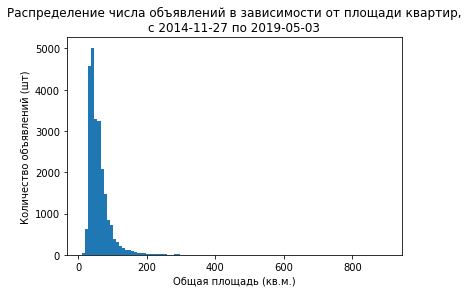

In [124]:
plt.hist(
    data['total_area'],
    bins = 100
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('Общая площадь (кв.м.)')
plt.title(
    """Распределение числа объявлений в зависимости от площади квартир,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

Судя по полученному графику, значения площади свыше 110 можно считать редкими. Построим диаграмму размаха, чтобы убедиться в этом:

Подберём значения для выборки так, чтобы исключить выбросы: 

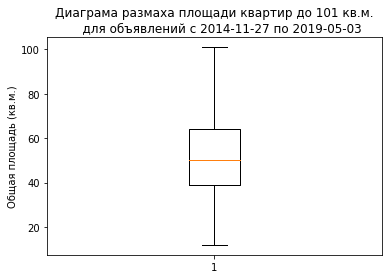

In [129]:
plt.boxplot(
    x = data.query('total_area < 101')['total_area']
)
plt.ylabel('Общая площадь (кв.м.)')
plt.title(
    """Диаграма размаха площади квартир до 101 кв.м.
    для объявлений с 2014-11-27 по 2019-05-03"""

)
plt.show()

посчитаем среднее для ограниченной выборки:

In [68]:
data.query('total_area < 101')['total_area'].mean()

53.00530961731665

Значение среднего стало близким к медианному, так как в нашей выборке отсутствуют выбросы.

узнаем среднее и медианное значение для цены за квадратный метр:

In [69]:
print('mean price_per_square_meter - ', data['price_per_square_meter'].mean())
print('median price_per_square_meter - ', data['price_per_square_meter'].median())

mean price_per_square_meter -  99421.65639461846
median price_per_square_meter -  95000.0


Построим гистограмму для параметра цена за квадратный метр:

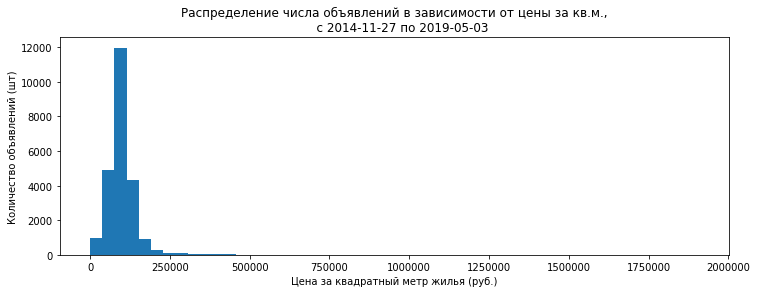

In [158]:
plt.figure(figsize=(12,4))
plt.hist(
    data['price_per_square_meter'],
    bins = 50
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('Цена за квадратный метр жилья (руб.)')
plt.title(
    """Распределение числа объявлений в зависимости от цены за кв.м.,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

Построим диаграмму размаха, подобравзначения для выборки так, чтобы исключить выбросы:

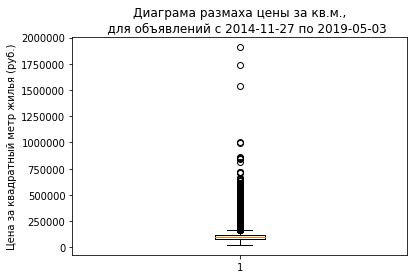

In [159]:
plt.boxplot(
    x = data.query('24100 < price_per_square_meter')['price_per_square_meter']
)
plt.ylabel('Цена за квадратный метр жилья (руб.)')
plt.title(
    """Диаграма размаха цены за кв.м.,
    для объявлений с 2014-11-27 по 2019-05-03"""

)
plt.show()

Так как в дальнейшем нам предстоит оценивать квартиры в центре, и мы предполагаем что квартиры в центре могут быть сильно дороже квартир в остальной части города, то ограничивать выборку по параметру будем ниже нижнего квартиля.

Оценим среднее для выборки:

In [72]:
print('mean price_per_square_meter - ', data.query('24100 < price_per_square_meter')['price_per_square_meter'].mean())
print('median price_per_square_meter - ', data.query('24100 < price_per_square_meter')['price_per_square_meter'].median())

mean price_per_square_meter -  100322.13384440931
median price_per_square_meter -  95249.97031231446


Найдем среднее и медианное значение для числа комнат:

In [73]:
print('mean rooms - ', data['rooms'].mean())
print('median rooms - ', data['rooms'].median())

mean rooms -  2.070635891809781
median rooms -  2.0


Величины близки, но для определения выбросов построим гистограмму:

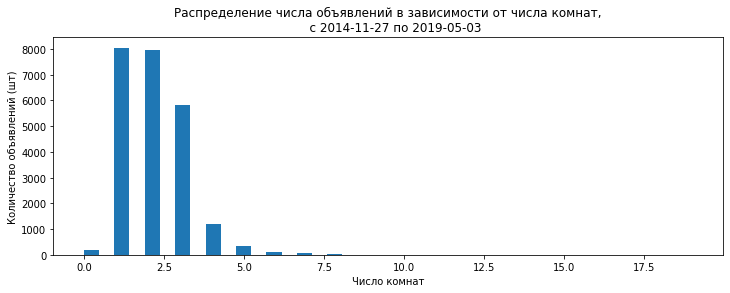

In [132]:
plt.figure(figsize=(12,4))
plt.hist(
    data['rooms'],
    bins = 40
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('Число комнат (шт)')
plt.title(
    """Распределение числа объявлений в зависимости от числа комнат,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

построим диаграмму размаха, для оценки выбросов, ограничив выборку.

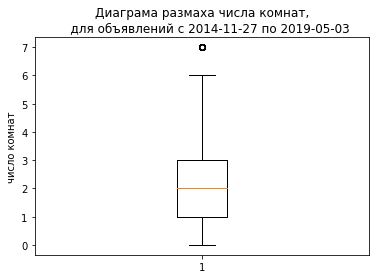

In [133]:
plt.boxplot(
    x = data.query('rooms < 8')['rooms']
)
plt.ylabel('Число комнат (шт)')
plt.title(
    """Диаграма размаха числа комнат,
    для объявлений с 2014-11-27 по 2019-05-03"""

)
plt.show()

Судя по графику, случаи, когда число квартир 7 и более являются выбросами.

Оценим среднее и медианное значение для высоты потолков:

In [76]:
print('mean ceiling_height - ', data['ceiling_height'].median())
print('median ceiling_height - ', data['ceiling_height'].mean())

mean ceiling_height -  2.65
median ceiling_height -  2.724358411747331


Построим гистограмму для параметра высота потолков:

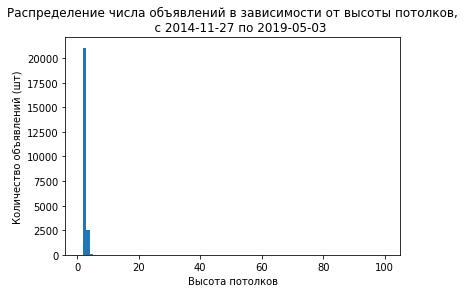

In [134]:
plt.hist(
    data['ceiling_height'],
    bins = 100
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('Высота потолков (м)')
plt.title(
    """Распределение числа объявлений в зависимости от высоты потолков,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

Подберём интервал так, чтобы исключить выбросы. Построим диаграмму разброса:

Для центра Санкт-Петербурга характерны квартиры с высокими потолками, где высота превышает 3 м. Учитывая это, ограничим значения по параметру диапазоном от 2.58 до 3.2 м.

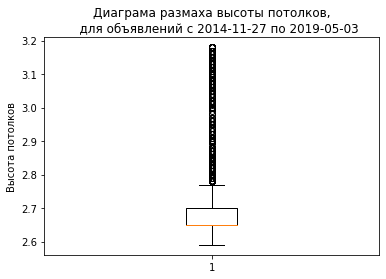

In [144]:
plt.boxplot(
    x = data.query('2.58 < ceiling_height < 3.2')['ceiling_height']
)
plt.ylabel('Высота потолков (м)')
plt.title(
    """Диаграма размаха высоты потолков,
    для объявлений с 2014-11-27 по 2019-05-03"""

)
plt.show()

Изучим время продажи квартиры. Построим гистограмму:

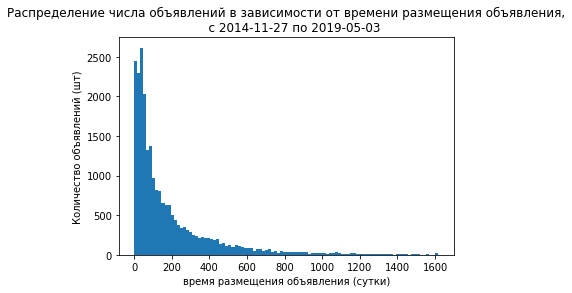

In [145]:
plt.hist(
    data['days_exposition'],
    bins = 100
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('время размещения объявления (сутки)')
plt.title(
    """Распределение числа объявлений в зависимости от времени размещения объявления,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

In [ ]:
Изучим объявления, время продажи которых состовляло до 100 дней:

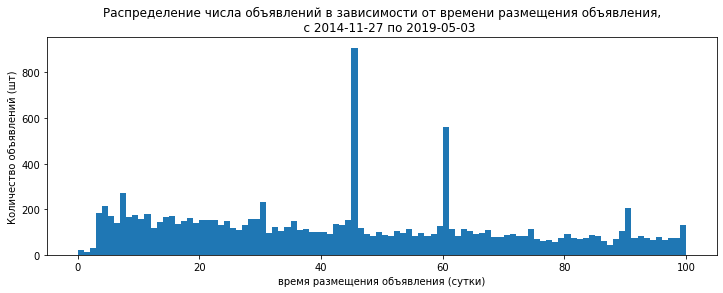

In [157]:
data_100 = data.query('days_exposition <= 100')
plt.figure(figsize=(12,4))
plt.hist(
    data_100['days_exposition'],
    bins = 100
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('время размещения объявления (сутки)')
plt.title(
    """Распределение числа объявлений в зависимости от времени размещения объявления,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()

В выбранном диапазоне (до 100 суток) присутствуют пики на отметках 7, 30, 45, 60 и 90 дней. Возможно, что квартиры в основном продавались в эти сроки, или же объявления снимались автоматически. Этот момент нужно уточнить у разработчиков Яндекс.Недвижимость, и, если существует алгоритм снятия публикаций по времени публикации, то эти пики являются аномалиями. Посчитаем число число объявлений в пиках:

In [160]:
len(data.query('days_exposition in [7, 30, 45, 60, 90]'))

2170


Исключим эти значения и построим диаграмму для того же диапазона (до 100 сут.):

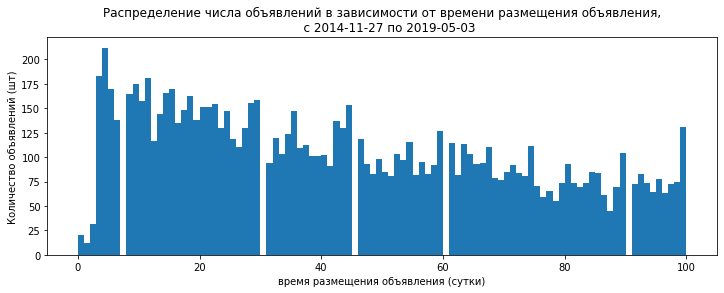

In [188]:
data_days_exposition_right = data.query('days_exposition <= 100 and days_exposition not in [7, 30, 45, 60, 90]')
plt.figure(figsize=(12,4))
plt.hist(
    data_days_exposition_right['days_exposition'],
    bins = 100
)
plt.ylabel('Количество объявлений (шт)')
plt.xlabel('время размещения объявления (сутки)')
plt.title(
    """Распределение числа объявлений в зависимости от времени размещения объявления,
    с 2014-11-27 по 2019-05-03"""
)
plt.show()


Посчитаем среднее  и медиану:

In [189]:
data = data.query('days_exposition not in [7, 30, 45, 60, 90]')
print('mean days_exposition - ', data['days_exposition'].mean())
print('median days_exposition - ', data['days_exposition'].median())

mean days_exposition -  199.8349203400065
median days_exposition -  112.0



Построим диаграмму размаха, ограничив диапазон так, чтобы исключить выбросы:

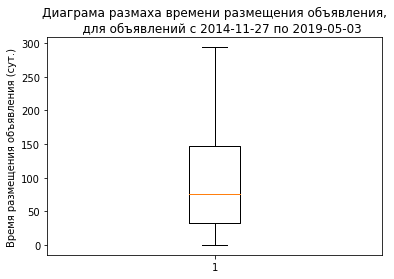

In [199]:
plt.boxplot(
    x = data.query('days_exposition < 295')['days_exposition'],
)
plt.ylabel('Время размещения объявления (сут.)')
plt.title(
    """Диаграма размаха времени размещения объявления,
    для объявлений с 2014-11-27 по 2019-05-03"""

)
plt.show()

Продажи идут долго, если квартиры не проданы за 295 дней. При этом медианное значение для объявления - 75. Быстрые продажи ниже нижнего квартиля (32 дней) попадают в доверительный интервал. Ограничим days_exposition до 295 и посмотрим, как изменится среднее: 

In [191]:
print('mean days_exposition - ', data.query('days_exposition < 295')['days_exposition'].mean())
print('median days_exposition - ', data.query('days_exposition < 295')['days_exposition'].median())

mean days_exposition -  96.5862336114422
median days_exposition -  75.0


Исключим редкие и выбивающиеся значения, сформировав новую таблицу:

In [193]:
new_data = data.query(
    '''total_area < 101 \
    and rooms < 7 \
    and 2.58 < ceiling_height < 3.2 \
    and days_exposition < 295 \
    and 24100 < price_per_square_meter'''
)

Оценим распределение данных в новой таблице:

In [194]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,11472.0,9.877354e+00,5.660278e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,11472.0,5.266615e+06,2.922743e+06,780000.000000,3.493826e+06,4.600000e+06,6.321000e+06,5.300000e+07
total_area,11472.0,5.316544e+01,1.778899e+01,13.000000,3.900000e+01,5.000000e+01,6.500000e+01,1.009000e+02
rooms,11472.0,1.840220e+00,8.582837e-01,0.000000,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
ceiling_height,11472.0,2.695814e+00,1.065392e-01,2.590000,2.650000e+00,2.650000e+00,2.700000e+00,3.180000e+00
floors_total,11472.0,1.208290e+01,6.994812e+00,1.000000,5.000000e+00,1.000000e+01,1.700000e+01,6.000000e+01
living_area,11472.0,2.964092e+01,1.252626e+01,2.000000,1.800000e+01,2.870000e+01,3.820000e+01,8.910001e+01
floor,11472.0,6.553957e+00,5.276891e+00,1.000000,3.000000e+00,5.000000e+00,9.000000e+00,3.100000e+01
kitchen_area,11472.0,1.002457e+01,4.067133e+00,0.000000,7.682997e+00,9.595677e+00,1.150000e+01,5.000000e+01
balcony,11472.0,6.252615e-01,9.760447e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Количество объявлений сократилось до 11 472

Выведем 5 случайных строк (в транспорированном виде):

In [195]:
new_data.sample(5).T

,1389,16968,11205,12981,3927
total_images,2,1,13,4,18
last_price,1.16349e+07,4e+06,5.32e+06,3.398e+06,9.45e+06
total_area,99.7,59,55,37.7,68
first_day_exposition,2018-10-10 00:00:00,2019-02-17 00:00:00,2019-04-01 00:00:00,2016-04-12 00:00:00,2017-04-05 00:00:00
rooms,3,2,2,1,2
ceiling_height,2.72,2.65,2.75,2.7,2.8
floors_total,18,19,16,17,9
living_area,54.7,30,30,16.3,38
floor,11,9,13,16,9
is_apartment,False,False,False,False,False


**Вывод:**
Проведен анализ редких и выбивающихся значений для таких параметров как площадь, цена за квадратный метр, число комнат,высота потолков и время продажи. Сформирована новая таблица, в которую не включены редкие и выбивающиесязначения.

### Анализ факторов, влияющих на стоимость квартиры

Далее в анализе для оценки стоимости квартиры будем испольщовать не последнюю цену, а стоимость квадратного метра жилья. Опеределим диапазон дат наших очищенных данных:

In [209]:
print(new_data['first_day_exposition'].min())
print(new_data['first_day_exposition'].max())

2015-09-20 00:00:00
2019-05-03 00:00:00


Для оценки влияния площади на цену квадратного метра, построим график:

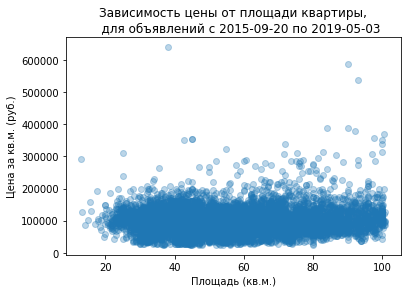

0.061418019462173803

In [211]:
plt.scatter(
    new_data['total_area'],
    new_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Площадь (кв.м.)')
plt.title(
    """Зависимость цены от площади квартиры,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

new_data['price_per_square_meter'].corr(new_data['total_area'])

Из графика видно, что основная область значений цены за квадратный метр не зависит от общей площади квартиры. Корреляция слабая - с увеличением площади цена снижается незначительно.

Построим график зависимости цены от числа комнат:

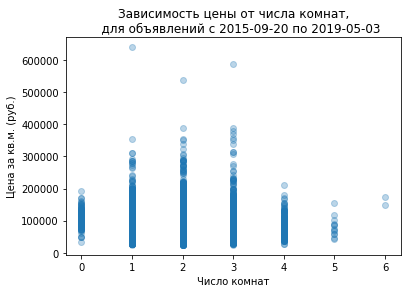

-0.12863412774333824

In [215]:
plt.scatter(
    new_data['rooms'],
    new_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Число комнат')
plt.title(
    """Зависимость цены от числа комнат,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

new_data['price_per_square_meter'].corr(new_data['rooms'])

Основная область значений не зависит от числа комнат, но среди квартир с числом комнат от 1 до 3 встречаются варианты превышающие среднюю цену более чем в 2 раза.  Корреляция опять слабая, с увеличением числа комнат цена незначительно снижается. Но с увеличением числа комнат, обычно, увеличивается и площадь. Следовательно низкий коэффициент корреляции Пирсона был ожидаем.

Построим график зависимости цены от расстояния до центра города:

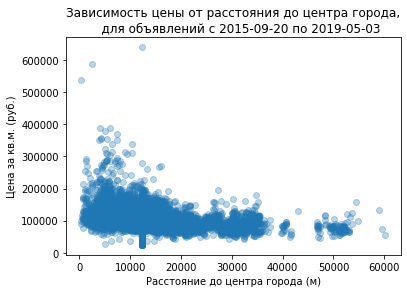

-0.23420217302181412

In [213]:
plt.scatter(
    new_data['cityCenters_nearest'],
    new_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Расстояние до центра города (м)')
plt.title(
    """Зависимость цены от расстояния до центра города,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

new_data['price_per_square_meter'].corr(new_data['cityCenters_nearest'])

Выделяющаяся на графике область значений для расстояния от центра 12244 вероятно возникла в следствии заполнения пропусков. Из графика видно, что разброс цен уменьшается с увеличением расстояния. Ограничим данные по расстоянию до 40000 м и цене до 250000, исключим квартиры на расстоянии 12244 м:

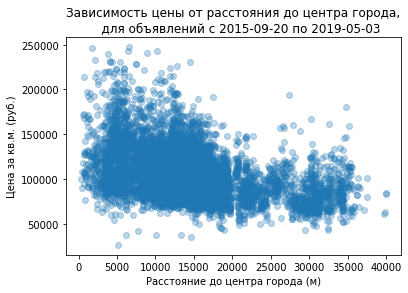

-0.4074824195492181

In [217]:
nnew_data = new_data.query(
    'cityCenters_nearest < 40000 and cityCenters_nearest != 12244 and price_per_square_meter < 250000'
)
plt.scatter(
    nnew_data['cityCenters_nearest'],
    nnew_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Расстояние до центра города (м)')
plt.title(
    """Зависимость цены от расстояния до центра города,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()
nnew_data['price_per_square_meter'].corr(new_data['cityCenters_nearest'])

С увеличением расстояния до центра города стоимоть квадратного метра незначительно уменьшается.

Для оценки влияния этажа квартиры на стоимость, сгруппируем данные по категориям этаж и построим график:

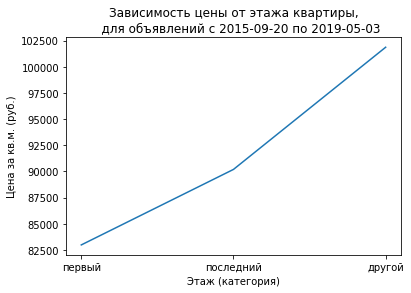

In [241]:
floor_categorys = new_data.pivot_table(index='floor_category', values = 'price_per_square_meter').sort_values(by='price_per_square_meter')
floor_categorys
plt.plot(floor_categorys)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Этаж (категория)')
plt.title(
    """Зависимость цены от этажа квартиры,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

Самая высокая средняя цена на квадратный метр у квартир, находящихся между первым и последним этажами, а самая низкая средняя цена на квадратный метру квартир на первом этаже.

Проанализируем данные, сгруппировав таблицу по годам, месяцам и дням недели, найдем среднюю цену квадратного метра и построим график:

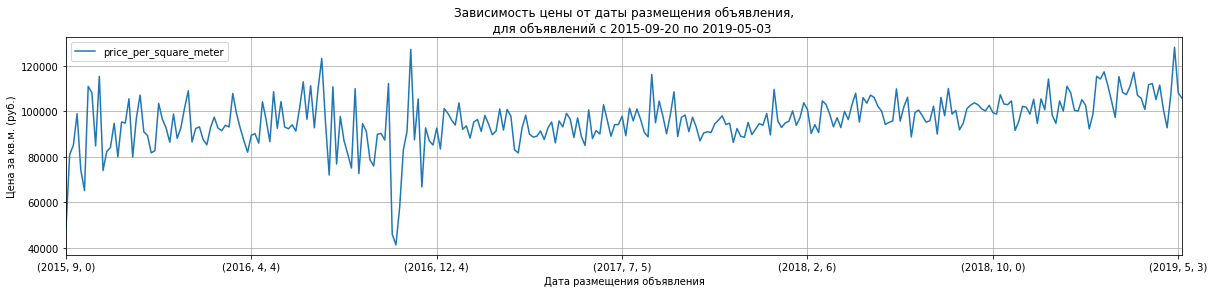

In [244]:
date = new_data.pivot_table(
    index=['year_exposition', 'month_exposition', 'week_day_exposition'], 
    values = 'price_per_square_meter'
).plot(figsize=(20,4), grid = True)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Дата размещения объявления')
plt.title(
    """Зависимость цены от даты размещения объявления,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

Из графика видно, что средняя цена за квадратный метр была минимальной для объявлений,размещенных осенью 2016 года и выросла к маю 2019 года. 

**Вывод:**

С увеличением числа комнат и площади квартиры цена квадратного метра снижается незначительно. С увеличением расстояния от центра города цена уменьшается. 

Цена квартир на первом этаже в среднем ниже квартир на последнем, но дороже продаются квартиры между первым и последним этажами.

Что касается даты размещения объявлений, можно проследить колебание средней цены заквадратныйметр в течение времени, средняя цена за квадратный метр была минимальной для объявлений,размещенных осенью 2016 года и выросла к маю 2019 года.  

### Анализ десяти населенных пунктов с наибольшим числом объявлений

Выберем 10 населенных пунктов с наибольшимчислом объявлений:

In [177]:
location_top = new_data['locality_name'].value_counts().head(10)
location_top_data = new_data.query('locality_name in @location_top.index')

Посчитаем среднюю цену квардратного метра для этих населенных пунктов:

In [178]:
mean_price_per_sq_meter = location_top_data.pivot_table(
    index='locality_name', 
    values = 'price_per_square_meter',
    aggfunc = ['mean', 'count']
)
mean_price_per_sq_meter.columns = ['mean_price','count']
mean_price_per_sq_meter.sort_values('mean_price')

,mean_price,count
locality_name,,
Выборг,58601.810813,112
Всеволожск,69835.275165,238
Гатчина,69865.294748,154
Колпино,75235.473799,153
Шушары,79459.157334,279
Мурино,86261.430461,444
Парголово,90193.356057,203
Кудрово,95635.516457,341
Пушкин,103227.716170,165


**Вывод:**

Больше всего объявлений о  продаже квартир в Санкт-Петербурге - **7526**, а меньше в Выборге - **112**.

Самая высокая средняя цена на квадратный метр жилья, среди выделенных 10 населенных пунктов, в Санкт-Петербурге (**111 438**), а самая низкая - в Выборге (**58 601**).

### Анализ изменения цены по степени удалённости от центра

Выделим квартиры в Санкт-Петербурге:

In [245]:
spb_data = new_data.query('locality_name == "Санкт-Петербург"')
print('число объявлений о продаже квартир в Санкт-петербурге -', len(spb_data))

число объявлений о продаже квартир в Санкт-петербурге - 7526


Опеределим диапазон дат данных spb_data:

In [246]:
print(spb_data['first_day_exposition'].min())
print(spb_data['first_day_exposition'].max())

2015-09-24 00:00:00
2019-05-03 00:00:00


Создадим столбец с расстоянием до центра, выраженным в км (округленным до целого):

In [248]:
spb_data.loc[:,'cityCenters_nearest_km'] = round(spb_data.loc[:,'cityCenters_nearest'] / 1000)

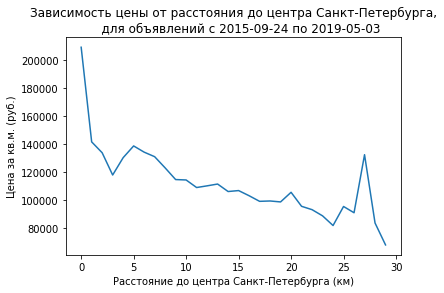

In [252]:
spb_cityCenters_nearest = spb_data.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter')
plt.plot(spb_cityCenters_nearest)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Расстояние до центра Санкт-Петербурга (км)')
plt.title(
    """Зависимость цены от расстояния до центра Санкт-Петербурга,
    для объявлений с 2015-09-24 по 2019-05-03"""
)
plt.show()

Из полученного графика видно обратную зависимость - с увеличением расстояния до центра Санкт-Петербурга цена за квадратный метр уменьшается. Цена за квадратный метр падает до отметки в 3 км, есть повышение средней цены за кв.м. на расстоянии 5 км. Далее цена продолжает снижаться, вплоть до пика на отметке 28 км. Выделим сегмент квартир, для котрых расстояние до центра города не превышает 5 км:

In [182]:
spb_centre_data = spb_data.query('cityCenters_nearest_km <= 5')
print('число объявлений о продаже квартир в центре -', len(spb_centre_data))

число объявлений о продаже квартир в центре - 796


Проанализируем для квартир в Санкт-Петербурге и сегменте квартир в центре следующие параметры:
- общая площадь
- цена
- цена за квадратный метр
- число комнат
- высота потолков

Выделим среднии значения для сегмента в центре и найдем их отношение к средним по Санкт-Петербургу:

In [183]:
print(spb_centre_data[['total_area', 'price_per_square_meter', 'rooms', 'ceiling_height']].mean())
print()
print(spb_centre_data[['total_area', 'price_per_square_meter', 'rooms', 'ceiling_height']].median())

(
    spb_centre_data[['total_area', 'price_per_square_meter', 'rooms', 'ceiling_height']].mean() 
    / spb_data[['total_area', 'price_per_square_meter', 'rooms', 'ceiling_height']].mean()
)

total_area                    64.598040
price_per_square_meter    132863.498696
rooms                          2.258794
ceiling_height                 2.786219
dtype: float64

total_area                    65.000000
price_per_square_meter    123961.780153
rooms                          2.000000
ceiling_height                 2.650000
dtype: float64


total_area                1.178390
price_per_square_meter    1.192246
rooms                     1.198173
ceiling_height            1.029675
dtype: float64

Для квартир в центре Санкт-Петербурга средние показатели:
- площадь 65.0 квадратных метров
- стоимоть квадратного метра - 132863
- число комнат 2.3 (по медиане 2)
- высота потолков в среднем 2.78 м

Цены за квадратный метр в сегменте квартир в центре в среднем в 1.2 раза выше, чем в Санкт-Петербурге в целом. Так же квартиры в центре больше по площади и количеству комнат. А высота потолков в среднем не отличается от высоты потолков по городу.

Проанализируем, как влияет на цену заквадратный метр число комнат, этаж, удаленность от центра и дата размещения объявления для всех квартир в Санкт-Петербурге и сегмента в центре.

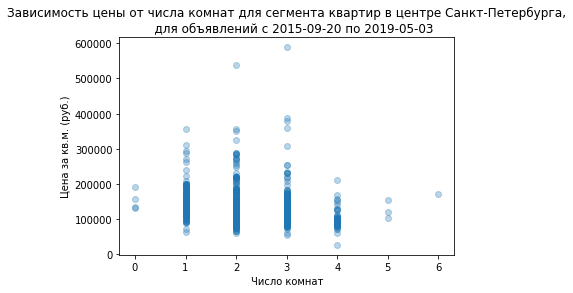

In [253]:
plt.scatter(
    spb_centre_data['rooms'],
    spb_centre_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Число комнат')
plt.title(
    """Зависимость цены от числа комнат для сегмента квартир в центре Санкт-Петербурга,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

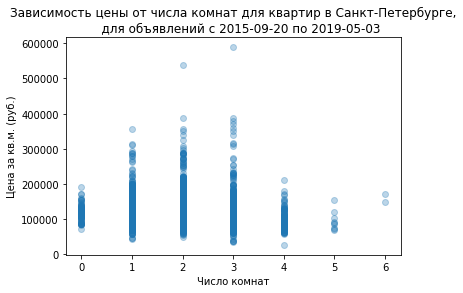

In [254]:
plt.scatter(
    spb_data['rooms'],
    spb_data['price_per_square_meter'],
    alpha=0.3
)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Число комнат')
plt.title(
    """Зависимость цены от числа комнат для квартир в Санкт-Петербурге,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

Среди сегмента квартир в центре распределение цены за квадратный метр в зависимости от числа комнат схоже с распледелением для всех объявлений из Санкт-Петербурга.

Проанализируем, как влияет на цену этаж для всех квартир в Санкт-Петербурге и сегмента в центре.

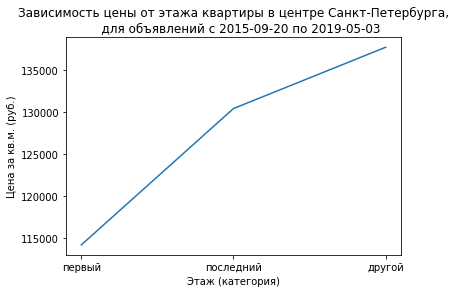

In [260]:
spb_centre_floor = spb_centre_data.pivot_table(
    index='floor_category', 
    values = 'price_per_square_meter'
).sort_values(by='price_per_square_meter')
plt.plot(spb_centre_floor)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Этаж (категория)')
plt.title(
    """Зависимость цены от этажа квартиры в центре Санкт-Петербурга,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

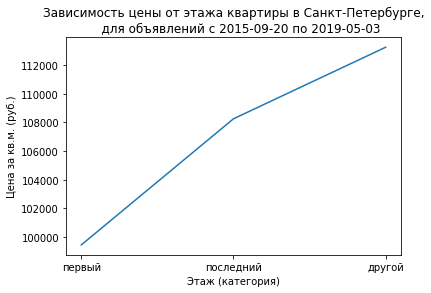

In [261]:
spb_floor = spb_data.pivot_table(
    index='floor_category', 
    values = 'price_per_square_meter'
).sort_values(by='price_per_square_meter')
plt.plot(spb_floor)
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Этаж (категория)')
plt.title(
    """Зависимость цены от этажа квартиры в Санкт-Петербурге,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

Распределение средней цены на квадратный метр в зависимости от этажа, для квартир расположенных в центре схоже с распледелением для всех объявлений из Санкт-Петербурга. Самые большие цены у квартир между первым и последним этажами,самые низкие - у квартир на первом этаже. 

Проанализируем, как влияет на цену дата размещения объявлений в Санкт-Петербурге и для сегмента в центре.

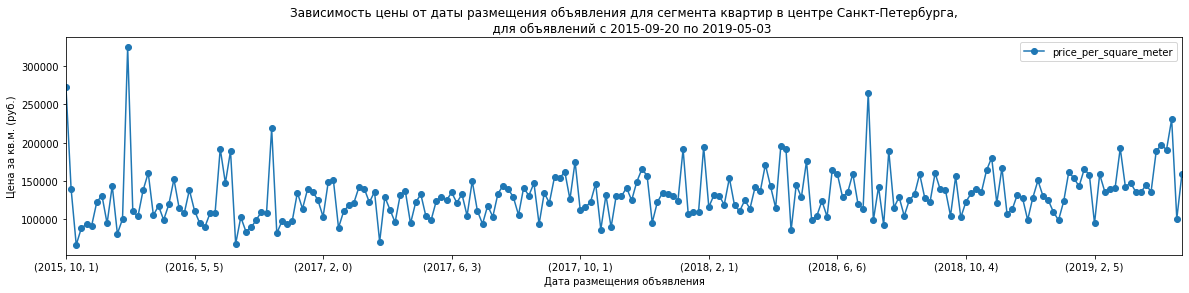

In [263]:
spb_centre_data.pivot_table(
    index=['year_exposition', 'month_exposition', 'week_day_exposition'], 
    values = 'price_per_square_meter'
).plot(figsize=(20,4), title ='spb_centre', style='o-')
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Дата размещения объявления')
plt.title(
    """Зависимость цены от даты размещения объявления для сегмента квартир в центре Санкт-Петербурга,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

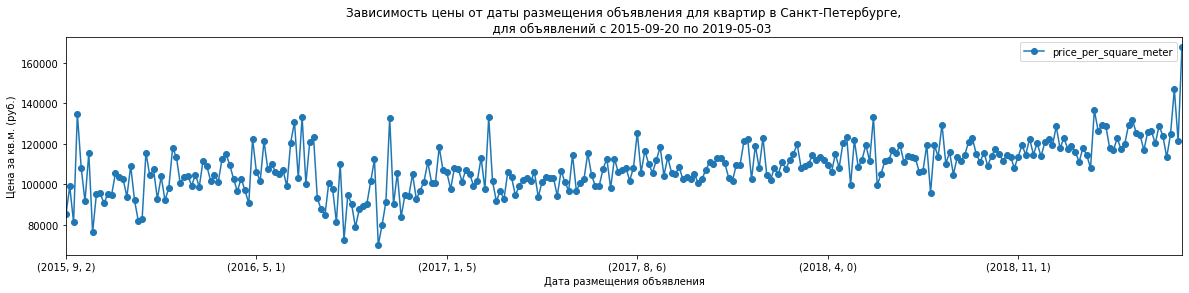

In [262]:
spb_data.pivot_table(
    index=['year_exposition', 'month_exposition', 'week_day_exposition'], 
    values = 'price_per_square_meter'
).plot(figsize=(20,4), title ='spb', style='o-')
plt.ylabel('Цена за кв.м. (руб.)')
plt.xlabel('Дата размещения объявления')
plt.title(
    """Зависимость цены от даты размещения объявления для квартир в Санкт-Петербурге,
    для объявлений с 2015-09-20 по 2019-05-03"""
)
plt.show()

Так как в отдельный сегмент жилья в центре было выделено всего 796 объявлений, а наблюдения велись на протяжении несколько лет, продажа даже одной квартиры влияет на график зависимости цен. Можно наблюдать рост цены за квадратный метр в течение времени как для сегмента квартир в центре так и для всех квартир в Санкт-Петербурге.  

**Вывод:**

Цены за квадратный метр в сегменте квартир в центре в среднем в 1.2 раза выше, чем в Санкт-Петербурге в целом. Так же квартиры в центре больше по площади и количеству комнат. А высота потолков в среднем не отличается от высоты потолков по городу.

На цену квартиры в центральном сегменте большое влияние имеет этаж - самые низкие цены у квартир на первом этаже,а самые высокие - у рассположенных между первым и последним этажами. Цена заквадратный метр не зависит от количества комнат. 

Так как в отдельный сегмент жилья в центре было выделено всего 796 объявлений, а наблюдения велись на протяжении несколько лет, продажа даже одной квартиры влияет на график зависимости цен, но мжно наблюдать рост цены за квадратный метр в течение времени как для сегмента квартир в центре так и для всех квартир в Санкт-Петербурге.

## Общий вывод

Был проведен исследовательский анализ данных, предоставленных сервисом Яндекс.Недвижимость. В данных обнаружены и заполнены пустые значения, тип данных оптимизирован. Данные дополнены днем недели, месяцем и годом публикации. Рассчитаны цены за квадратный метр и соотношения жилой площади и площади кухни к полний. Для этажа квартиры определены категории - "первый", "последний", "другой".

Определены и исключены редкие и выбивающиеся значения по площиди, цене, числу комнат, высоте потолков и времени продажи квартиры:

- площадь до 101 квадратного метра
- цена от 24 100
- максимальное число комнат - 6
- высота потолков от 2.58 м до 3.2м
- размещение объявления более 295 дней, а также ислючены значения 7, 30, 45, 60 и 90 дней

Изучено влияние на стоимость квадратного метра таких факторов как площадь, числло комнат, удаленность от центра, этаж, дата размещения публикации.С увеличением числа комнат и площади квартиры цена квадратного метра снижается незначительно. С увеличением расстояния от центра города цена уменьшается. Цена квартир на первом этаже в среднем ниже квартир на последнем, но дороже продаются квартиры между первым и последним этажами.

Что касается даты размещения объявлений, можно проследить колебание средней цены заквадратныйметр в течение времени, средняя цена за квадратный метр была минимальной для объявлений, размещенных осенью 2016 года и выросла к 2019 году.

Выделено 10 населенных пунктов с наибольшим числом объявлений, среди них самая высокая средняя цена на квадратный метр жилья в Санкт-Петербурге (111 658), а самая низкая - в Выборге (58 820).

Выделены объявления о продаже квартир в Санкт-Петербурге (8482) и среди них выделен сегмент квартир в центре (907) - на расстоянии до 5 км включительно. Для квартир в центре Санкт-Петербурга средние показатели:

- площадь 65.0 квадратных метров
- стоимоть квадратного метра - 132 863
- число комнат 2.3 (по медиане 2)
- высота потолков в среднем 2.78 м

Цены за квадратный метр в сегменте квартир в центре в среднем в 1.2 раза выше, чем в Санкт-Петербурге в целом. Так же квартиры в центре в среднем в 1.2 разу больше по площади в и количеству комнат. А высота потолков в среднем не отличается от высоты потолков по городу.